# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[1,3],
             [1,2]])
B = np.linalg.inv(A)@np.array([1,0])  # @   -> Multiplicación matricial
B

array([-2.,  1.])

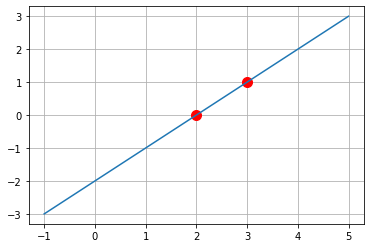

In [3]:
plt.plot([3,2],[1,0],'or',ms=10)
x = np.linspace(-1,5,100)
y = B[0]+B[1]*x
plt.plot(x,y)
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [4]:
A = np.array([[1,0,0],
             [1,1,1],
              [1,2,4]])

B = np.linalg.inv(A)@np.array([1,0,1])
B

array([ 1., -2.,  1.])

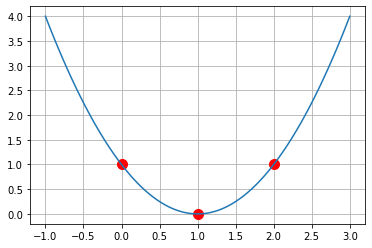

In [5]:
plt.plot([0,1,2],(1,0,1),'or',ms=10)

x = np.linspace(-1,3,100)
y = B[0]+B[1]*x+B[2]*x**2
plt.plot(x,y)
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

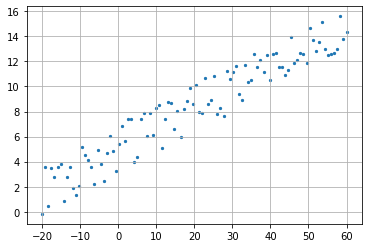

In [6]:
x = np.linspace(-20,60,100)
y = 5+1/6*x+4*np.random.rand(100)-2
plt.scatter(x,y,s=5)
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [7]:
import scipy.optimize as opt

In [8]:
opt.minimize?

In [9]:
def fun(B,x,y):
    f = B[0]+B[1]*x
    return np.sum((y-f)**2)

In [10]:
B0 = np.random.rand(2)
sol = opt.minimize(fun,B0,args=(x,y))
sol

      fun: 146.2548937498237
 hess_inv: array([[ 8.67574229e-03, -1.83787123e-04],
       [-1.83787123e-04,  9.18935629e-06]])
      jac: array([2.86102295e-05, 1.05285645e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 135
      nit: 2
     njev: 41
   status: 2
  success: False
        x: array([5.20178103, 0.15837208])

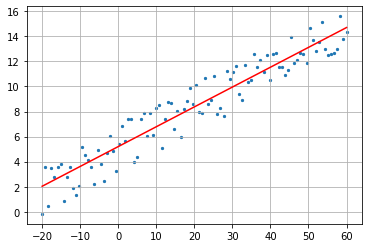

In [11]:
plt.scatter(x,y,s=5)
f = sol.x[0]+sol.x[1]*x
plt.plot(x,f,'r')
plt.grid()

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

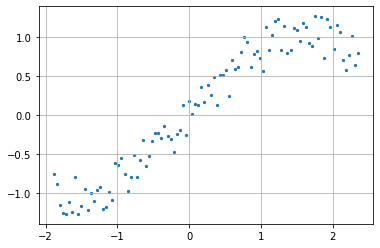

In [12]:
x = np.linspace(-3/5*np.pi,3/4*np.pi,100)
y = np.sin(x)+0.6*np.random.rand(100)-0.3
plt.scatter(x,y,s=5)
plt.grid()

In [13]:
sol = opt.minimize(fun,B0,args=(x,y))
sol

      fun: 7.6840512271974735
 hess_inv: array([[ 0.00518152, -0.00077039],
       [-0.00077039,  0.00326962]])
      jac: array([2.38418579e-07, 1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.04218479,  0.6247371 ])

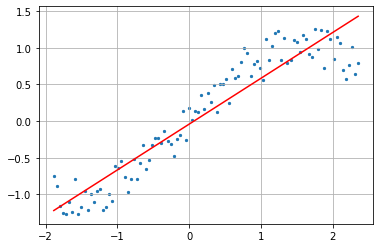

In [14]:
plt.scatter(x,y,s=5)
f = sol.x[0]+sol.x[1]*x
plt.plot(x,f,'r')
plt.grid()

In [15]:
# Ahora ajustando los puntos a una parábola
def fun (B,x,y):
    f = B[0]+B[1]*x+B[2]*x**2
    return np.sum((y-f)**2)

In [16]:
B0 = np.random.rand(3)
B0

array([0.94557404, 0.975517  , 0.01188445])

In [17]:
sol2 = opt.minimize(fun,B0,args=(x,y))
sol2

      fun: 5.827549421443939
 hess_inv: array([[ 0.0109877 ,  0.00108622, -0.00393984],
       [ 0.00108622,  0.0038633 , -0.00125982],
       [-0.00393984, -0.00125982,  0.00267341]])
      jac: array([2.14576721e-06, 1.78813934e-06, 7.98702240e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([ 0.10464295,  0.67168723, -0.09963126])

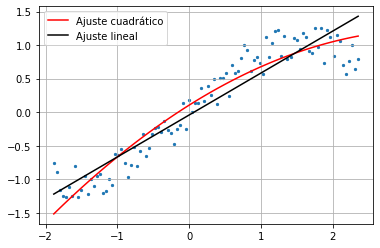

In [18]:
plt.scatter(x,y,s=5)
f = sol2.x[0]+sol2.x[1]*x+sol2.x[2]*x**2
plt.plot(x,f,'r',label='Ajuste cuadrático')

f1 = sol.x[0]+sol.x[1]*x
plt.plot(x,f1,'k',label='Ajuste lineal')

plt.legend()
plt.grid()

___

In [19]:
import sympy as sym

In [20]:
# Generar un vector de potencias de 'x'
sym.var('x')

x

In [21]:
# [x**0,x**1,x**2,...,x**(n-1)]
n = 10
[x**i for i in range(n)]

[1, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9]

In [22]:
x = np.linspace(-3/5*np.pi,3/4*np.pi,100)

In [23]:
def fun(B,x,y):
    n = len(B)
    X = np.array([x**i for i in range(n)])
    f = np.dot(B,X)
    return np.sum((y-f)**2)

In [24]:
B0 = np.random.rand(2) # Polinomio lineal
sol1 = opt.minimize(fun,B0,args=(x,y))
sol1

      fun: 7.684051227197466
 hess_inv: array([[ 0.85501261, -0.35387368],
       [-0.35387368,  0.14998341]])
      jac: array([1.66893005e-06, 3.51667404e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([-0.04218479,  0.62473711])

In [25]:
B0 = np.random.rand(3) # Polinomio cuadrático
sol2 = opt.minimize(fun,B0,args=(x,y))
sol2

      fun: 5.827549421443965
 hess_inv: array([[ 0.0109877 ,  0.00108622, -0.00393984],
       [ 0.00108622,  0.0038633 , -0.00125982],
       [-0.00393984, -0.00125982,  0.00267341]])
      jac: array([1.19209290e-07, 2.38418579e-07, 5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([ 0.10464295,  0.67168724, -0.09963127])

In [26]:
N = 6
for n in range (1,N+1):
    print(n)

1
2
3
4
5
6


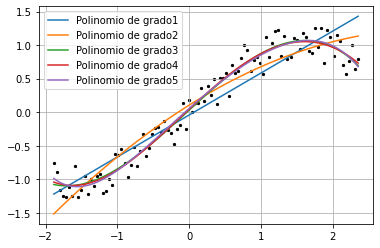

In [27]:
N = 5
sol = [] # Lista vacía
plt.scatter(x,y,c='k',s=5)
for n in range (1,N+1):
    B0 = np.random.rand(n+1)
    sol.append(opt.minimize(fun,B0,args=(x,y)))
    X = np.array([x**i for i in range(n+1)])
    f = np.dot(sol[n-1].x,X)
    plt.plot(x,f,label='Polinomio de grado'+str(n))
plt.legend()
plt.grid()

In [28]:
sol

[      fun: 7.684051227197477
  hess_inv: array([[ 0.00518152, -0.00077039],
        [-0.00077039,  0.00326962]])
       jac: array([-5.96046448e-08,  0.00000000e+00])
   message: 'Optimization terminated successfully.'
      nfev: 18
       nit: 4
      njev: 6
    status: 0
   success: True
         x: array([-0.04218479,  0.6247371 ]),
       fun: 5.82754942144394
  hess_inv: array([[ 0.0109877 ,  0.00108622, -0.00393984],
        [ 0.00108622,  0.0038633 , -0.00125982],
        [-0.00393984, -0.00125982,  0.00267341]])
       jac: array([2.68220901e-06, 2.50339508e-06, 7.68899918e-06])
   message: 'Optimization terminated successfully.'
      nfev: 36
       nit: 4
      njev: 9
    status: 0
   success: True
         x: array([ 0.10464295,  0.67168724, -0.09963127]),
       fun: 2.7321384920578904
  hess_inv: array([[ 0.01190338, -0.00264002, -0.00495849,  0.0014411 ],
        [-0.00264002,  0.01902681,  0.00288548, -0.00586439],
        [-0.00495849,  0.00288548,  0.00380662, -0.

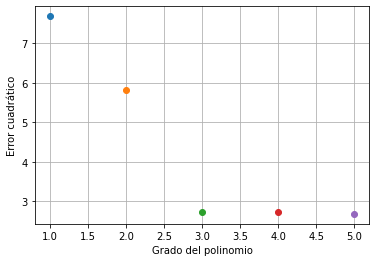

In [29]:
for i in range(N):
    plt.plot(i+1,sol[i].fun,'o')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático')
plt.grid()

**Entonces nos conviene tomar el polinomio de grado tres, ya qque no vemos gran mejoría en el error cuadrático al aumentar el grado del polinomio.**

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [33]:
def ridge(B,x,y,L):
    n = len(B)
    X = np.array([x**i for i in range(n)]) # [x**0,x**1,x**2,...,x**(n-1)]
    f = np.dot(B,X) #B[0]*x**0+B1*x**1+B2*x**2+...+B[n-1]**(n-1)
    return np.sum((y-f)**2)+L*np.sum(B**2)

In [58]:
sol=[]

for n in range(3,6):
    B0 = np.random.rand(n+1) # Se necesitan n+1 coeficientes
    sol.append(opt.minimize(ridge,B0,args=(x,y,10))) # Si L es cero, es por mínimos cuadrados, lo que hemos hecho hasta ahora
# Si L aumente, tiene a ser horizontal y a tener una menor diferencia en los polinomios

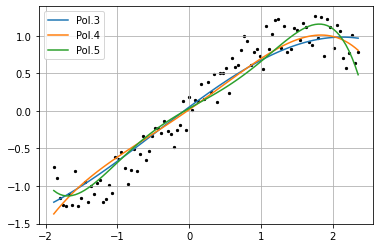

In [59]:
plt.scatter(x,y,c='k',s=5)

for i in range(3):
    n = len(sol[i].x)
    X = np.array([x**j for j in range(n)])
    f = np.dot(sol[i].x,X)
    plt.plot(x,f,label='Pol.'+str(i+3))

plt.legend()
plt.grid()

Lambda(L) también tiene un valor óptimo, pero ese no lo vamos a encontrar, por ahora

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [44]:
def lasso(B,x,y,L):
    n = len(B)
    X=np.array([x**i for i in range(n)])
    f = np.dot(B,X)
    return np.sum((y-f)**2)+L*np.sum(np.abs(B))

In [64]:
sol = []
for n in range(3,6):   # Rango de polinomios de 3 a 5
    B0 = np.random.rand(n+1) # Necesitamso n+1 coeficientes
    sol.append(opt.minimize(lasso,B0,args=(x,y,10)))  # L = 0 implica usar mínimos cuadrados

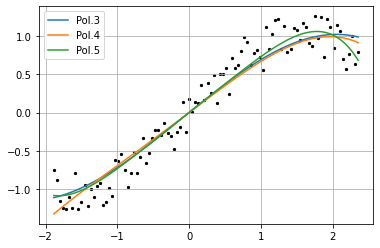

In [67]:
plt.scatter(x,y,c='k',s=5) # c='k' -> color negro. Tamaño 5 (s=5)

for i in range(3):
    n = len(sol[i].x)
    X = np.array([x**j for j in range(n)])
    f = np.dot(sol[i].x,X) # Prodcuto punto
    plt.plot(x,f,label='Pol.'+str(n-1)) # i+3 = n-1
plt.legend()
plt.grid()